In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family='SimHei')

# 癌症發生統計

68-104年縣市別性別癌症別發生率資料
來自：衛生福利部 國民健康署

來自：衛生福利部 國民健康署

In [2]:
df = pd.read_csv('http://data.hpa.gov.tw/dataset/4930fac7-cfed-439a-83a5-b24d69ce940b/resource/31213742-29da-49fd-9565-c41791098ca4/download/68104.csv',
                 thousands=',', encoding = 'Big5')
df.head()

,癌症診斷年,性別,縣市別,癌症別,年齡標準化發生率 WHO 2000世界標準人口 (每10萬人口),癌症發生數,平均年齡,年齡中位數,粗率 (每10萬人口)
0,1979,不分男女,台閩地區,口腔、口咽及下咽,3.40,439,53.37,55.0,2.50
1,1979,不分男女,台北市,口腔、口咽及下咽,3.85,65,52.00,55.0,2.96
2,1979,不分男女,台中市,口腔、口咽及下咽,4.16,45,54.18,55.0,2.88
3,1979,不分男女,台南市,口腔、口咽及下咽,1.58,19,55.79,57.0,1.24
4,1979,不分男女,高雄市,口腔、口咽及下咽,2.10,32,48.56,50.0,1.49


# 台灣歷年各癌症發生率 和 WHO 人口標準化癌症發生率 繪圖

Text(0,0.5,'台灣癌症粗發生率(每10萬人口)')

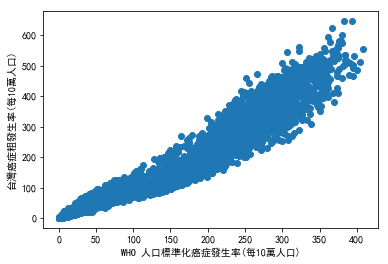

In [3]:
x = np.array(df['年齡標準化發生率  WHO 2000世界標準人口 (每10萬人口) ']) #WHO 人口標準化癌症發生率(每10萬人口)
y = np.array(df['粗率 (每10萬人口)']) #台灣癌症粗發生率(每10萬人口)
plt.scatter(x,y)
plt.xlabel('WHO 人口標準化癌症發生率(每10萬人口)')
plt.ylabel('台灣癌症粗發生率(每10萬人口)')

訓練資料

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
X = x.reshape(len(x),1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=10000)

In [6]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
Y_pred = regr.predict(x_test)

Text(0,0.5,'台灣癌症粗發生率(每10萬人口)')

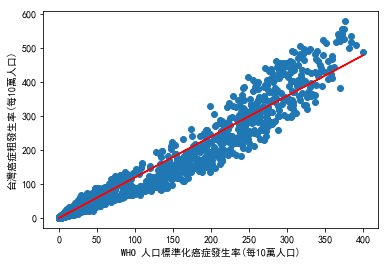

In [8]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_pred,'r')
plt.xlabel('WHO 人口標準化癌症發生率(每10萬人口)')
plt.ylabel('台灣癌症粗發生率(每10萬人口)')